In [1]:
from Model.Energy import PolarVonMisesEnergy
from Model.Proposal import VonMisesProposalPolar
from Data import get_dataloader_from_data
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from Model.Trainer import SNLTrainer

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'VonMisesProposalPolar' from 'Model.Proposal' (/Users/hhjs/Documents/Projects/SNL_directional/Model/Proposal/__init__.py)

# Target Distribution 

In [2]:
target_distribution = torch.distributions.VonMises(0 , 10)

In [3]:
sample_target_polar = target_distribution.sample((20000,1))


dataset_total = TensorDataset(sample_target_polar, )
data_train, data_val, data_test = torch.utils.data.random_split(dataset_total, [10000, 5000, 5000])
dataloader_train = DataLoader(data_train, batch_size=100, shuffle=True)
dataloader_val = DataLoader(data_val, batch_size=100, shuffle=False)

tensor(0.0047)


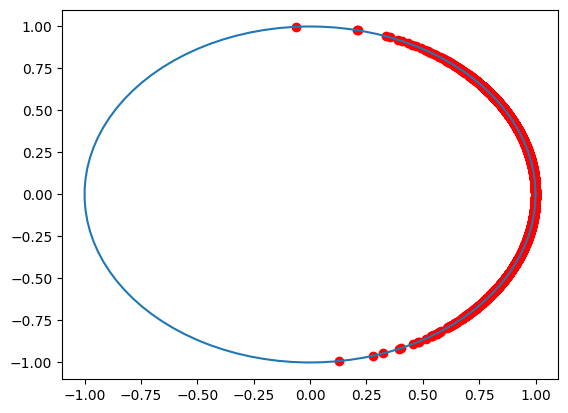

In [4]:
sample_target_polar = target_distribution.sample((10000,))
sample_target_cartesian = torch.stack([torch.cos(sample_target_polar), torch.sin(sample_target_polar)], dim=1)

print(sample_target_polar.mean())
fig, ax = plt.subplots()
ax.plot(
    np.cos(np.linspace(0, 2 * np.pi, 100)),
    np.sin(np.linspace(0, 2 * np.pi, 100)),
    )
ax.scatter(sample_target_cartesian[:, 0], sample_target_cartesian[:, 1], c='red')
plt.show()
# # ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
# ax.set_rticks([])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_frame_on(False)
# ax.plot(np.linspace(0, 2 * np.pi, 100), np.ones(100), color='black')
# ax.plot(sample_target_polar, torch.ones_like(sample_target_polar), 'o', markersize=2)
# plt.show()


# Proposal Distribution :

In [5]:
proposal_distribution = VonMisesProposalPolar(input_size= torch.Size([1,1]), phi = torch.tensor(1.0), kappa= torch.tensor(1.0))

Init Standard Gaussian...


tensor(0.6652)


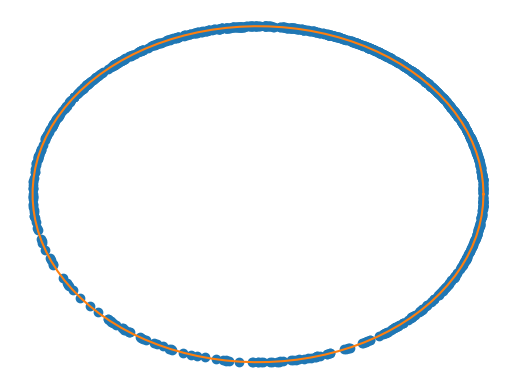

In [6]:
sample_proposal_polar = proposal_distribution.sample(1000,)
sample_proposal_cartesian = torch.stack([torch.cos(sample_proposal_polar), torch.sin(sample_proposal_polar)], dim=1)
# Plot a circle and sample from the von Mises distribution
import matplotlib.pyplot as plt
import numpy as np

print(sample_proposal_polar.mean())
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.plot(sample_proposal_cartesian[:, 0], sample_proposal_cartesian[:, 1], 'o')
ax.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)))
plt.show()


# Energy

In [7]:
energy = PolarVonMisesEnergy(learn_phi=True, learn_kappa=True)

In [8]:

energy(x = sample_proposal_polar)

tensor([[ 6.4209e-01],
        [ 9.9703e-01],
        [ 7.3419e-02],
        [ 2.7809e-01],
        [-6.9171e-01],
        [-7.4363e-01],
        [ 2.5463e-01],
        [-9.6221e-01],
        [ 7.4670e-01],
        [-9.7622e-01],
        [-9.8516e-01],
        [ 1.0693e-01],
        [-3.4777e-01],
        [-8.7166e-01],
        [-8.8332e-01],
        [-7.8009e-01],
        [ 6.4122e-02],
        [-9.3074e-01],
        [-1.4632e-01],
        [-2.2598e-01],
        [ 2.3068e-01],
        [ 9.9941e-01],
        [-5.8287e-02],
        [-6.2786e-01],
        [-8.8019e-01],
        [ 3.8028e-01],
        [-9.6664e-01],
        [-6.1079e-01],
        [ 9.9557e-01],
        [-8.8696e-01],
        [-7.7988e-01],
        [ 8.3661e-01],
        [ 8.4824e-02],
        [-9.9252e-01],
        [-8.1327e-01],
        [-9.8085e-01],
        [-1.7919e-01],
        [ 9.9168e-01],
        [ 6.0135e-01],
        [ 1.9406e-01],
        [-7.6387e-01],
        [-2.6424e-01],
        [-9.6481e-01],
        [-1

# Trainer :


In [9]:
trainer = SNLTrainer(energy=energy, proposal=proposal_distribution, dataloader=dataloader_train, val_dataloader=dataloader_val , n_sample_train=1000, n_sample_test=1000, lr=0.01, )

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


In [ ]:
trainer.train(n_iter=100000, n_iter_pretrain=2000,)

/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/polar_von_mises_2d.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  log_bessel = torch.tensor(torch.from_numpy(aux_kappa)).log()


{'loss': tensor([[8.0455]], grad_fn=<AddBackward0>), 'loss_target': tensor([[-0.9548]], grad_fn=<MeanBackward1>), 'loss_proposal': tensor([9.0004], grad_fn=<SubBackward0>), 'likelihood_lower_bound (SNL)': tensor([[-8.0455]], grad_fn=<SubBackward0>), 'likelihood_upper_bound': tensor([[8.8532]], grad_fn=<SubBackward0>)}
Step 0
{'loss': tensor([[7.0594]], grad_fn=<AddBackward0>), 'loss_target': tensor([[-0.9416]], grad_fn=<MeanBackward1>), 'loss_proposal': tensor([8.0010], grad_fn=<SubBackward0>), 'likelihood_lower_bound (SNL)': tensor([[-7.0594]], grad_fn=<SubBackward0>), 'likelihood_upper_bound': tensor([[7.8721]], grad_fn=<SubBackward0>)}
{'loss': tensor([[6.0599]], grad_fn=<AddBackward0>), 'loss_target': tensor([[-0.9436]], grad_fn=<MeanBackward1>), 'loss_proposal': tensor([7.0035], grad_fn=<SubBackward0>), 'likelihood_lower_bound (SNL)': tensor([[-6.0599]], grad_fn=<SubBackward0>), 'likelihood_upper_bound': tensor([[6.8723]], grad_fn=<SubBackward0>)}
{'loss': tensor([[5.0536]], grad_